# HomeWork 11

**DeadLine : 23:59 20 Azar 1399**

**Total points : 100pts**


Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 30 pts**

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [3]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    image = np.float32(image)
    ret,image = cv2.threshold(image,200,255,cv2.THRESH_BINARY_INV)
    res = image.copy()
    res = np.uint8(cv2.GaussianBlur(res,(3,3),1))
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    S = np.zeros_like(res,dtype=np.uint8)
    ab = np.uint8(res.copy())
    
    while True:
        ab = cv2.erode(ab,element)
        if len(np.where(ab > 0)[0])==0:
            break
        Sk = cv2.subtract(ab,
                          cv2.dilate(cv2.erode(ab,element),element))
        S = cv2.bitwise_or(S,Sk)
        
    return S

Test your implementation (don't change this cell).

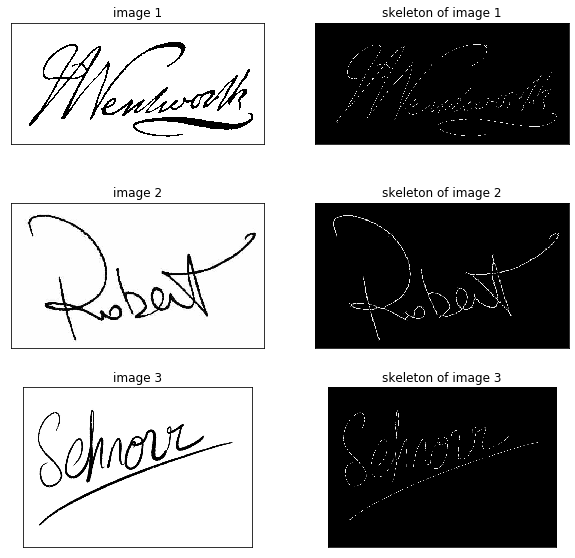

In [4]:
image_list = []

image1 = cv2.imread(os.path.join('images', 'q3a.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image_list.append([get_skeleton(image1), 'skeleton of image 1','img'])

image2 = cv2.imread(os.path.join('images', 'q3b.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image_list.append([get_skeleton(image2), 'skeleton of image 2','img'])

image3 = cv2.imread(os.path.join('images', 'q3c.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image_list.append([get_skeleton(image3), 'skeleton of image 3', 'img'])

plotter(image_list, 3, 2, True, 10, 10, 'Q3')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

Please, set your structuring element here:

In [5]:
structuring_element = np.uint8(np.ones((5,5)))

Implement these functions for calculating dilation and erosion in RGB space.

In [6]:
def RGB_dilate(image, structuring_element):
    '''
    Applies dilation in RGB space.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        dilated_image (numpy.ndarray): The dilated result image.   
    '''
    
    img = image.copy()
    dilated_image = image.copy()
    size = structuring_element.shape[0]
    r = size//2
    
    image = cv2.copyMakeBorder(
    image,
    top=r,
    bottom=r,
    left=r,
    right=r,
    borderType=cv2.BORDER_REPLICATE)
    
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    
    Ro = R.copy()
    Go = G.copy()
    Bo = B.copy()
    
    for i in range(Ro.shape[0]):
        for j in range(Ro.shape[1]):
            try:
                Ro[i,j] = np.max(R[i-r : i+r+1 , j-r : j+r+1])
                Go[i,j] = np.max(G[i-r : i+r+1 , j-r : j+r+1])
                Bo[i,j] = np.max(B[i-r : i+r+1 , j-r : j+r+1])
            except:
                continue

    dilated_image = cv2.merge([Ro,Go,Bo])
    return dilated_image[r:-r,r:-r,:]

In [7]:
def RGB_erode(image, structuring_element):
    '''
    Applies erosion in RGB space.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        eroded_image (numpy.ndarray): The eroded result image.   
    '''
    
    img = image.copy()
    eroded_image = image.copy()
    size = structuring_element.shape[0]
    r = size//2
    
    image = cv2.copyMakeBorder(
    image,
    top=r,
    bottom=r,
    left=r,
    right=r,
    borderType=cv2.BORDER_REPLICATE)
    
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    
    Ro = R.copy()
    Go = G.copy()
    Bo = B.copy()
    
    for i in range(Ro.shape[0]):
        for j in range(Ro.shape[1]):
            try:
                Ro[i,j] = np.min(R[i-r : i+r+1 , j-r : j+r+1])
                Go[i,j] = np.min(G[i-r : i+r+1 , j-r : j+r+1])
                Bo[i,j] = np.min(B[i-r : i+r+1 , j-r : j+r+1])
            except:
                continue
            
    eroded_image = cv2.merge([Ro,Go,Bo])
    return eroded_image[r:-r,r:-r,:]

Test your implementation (don't change this cell).

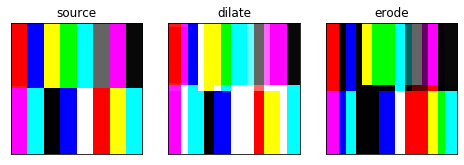

In [8]:
image_list = []
image = cv2.imread(os.path.join('images', 'q4.jpg'), cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([RGB_dilate(image, structuring_element), 'dilate', 'img'])
image_list.append([RGB_erode(image, structuring_element), 'erode', 'img'])
plotter(image_list, 1, 3, True, 8, 6, 'Q4')

To create proper files for sending in the Quera run this cell, please.

In [706]:
!python notebook_converter.py

End!!!

In [16]:
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), dtype="uint8")
input_image[np.where(input_image == 1)] = 255
print(input_image)
kernel = np.array((
        [1, 0, 1],
        [0, -1, 0],
        [1, 0, 1]), dtype="int")
output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel)
print()
print(output_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255 255 255   0   0   0   0   0]
 [  0   0 255 255 255 255 255 255 255 255 255 255   0   0]
 [  0   0   0   0   0 255 255 255 255   0 255   0   0   0]
 [  0   0 255   0 255 255 255 255 255   0 255   0   0   0]
 [  0   0 255 255 255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0 255   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 